# <font color=green> Pandas-III

## Ciência de Dados - Unesp

## Missing Values

<img src="miss.png" width=800 height=800>

* **Missing Values** são valores faltantes em colunas, esses podem ser oriundos de falhas em cargas de dados, falhas em crawlers ou até mesmo corrupção de dados.

* Missing Values podem ser um problema em várias situações, como por exemplo, algoritmos de machine learning que não trabalham bem com dados faltantes.

* Estes também podem atrapalhar resultados de análises.

* Vamos aprender como encontrar missing values na base de dados e como manipular esses valores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aluguel.csv', sep=';')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [4]:
# coletando os dados nulos

df.isnull().sum().sort_values(ascending=False)

IPTU          10237
Condominio     4093
Valor            17
Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
dtype: int64

In [5]:
df.isna().sum().sort_values(ascending=False)

IPTU          10237
Condominio     4093
Valor            17
Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
dtype: int64

In [6]:
df.shape

(32960, 9)

In [7]:
# Qual a porcentagem de significância dessa intância no dataFrame

(df['Valor'].isnull().sum() * 100) / df.shape[0]

0.05157766990291262

In [8]:
# Qaul a porcentagem de significância dessa intância no dataFrame

(df['IPTU'].isnull().sum() * 100) / df.shape[0]

31.05885922330097

In [9]:
# Qaul a porcentagem de significância dessa intância no dataFrame

(df['Condominio'].isnull().sum() * 100) / df.shape[0]

12.418082524271844

In [10]:
# todos os valores NaN dessa instância

df[df['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [11]:
df[(df['Valor'].isnull()) & (df['IPTU'].isnull()) & (df['Condominio'].isnull())]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [13]:
df2 = df.dropna()
df2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [14]:
32960 - 21152

11808

In [15]:
(21152 * 100) /32960

64.1747572815534

## Tratando os dados (Dropping)

In [16]:
df.Condominio

0         500.0
1           NaN
2        4020.0
3         390.0
4         230.0
          ...  
32955     350.0
32956     800.0
32957     509.0
32958     760.0
32959    4206.0
Name: Condominio, Length: 32960, dtype: float64

In [17]:
# Drop NaN em uma determinada coluna

df.dropna(subset=['Condominio'])

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [18]:
# Remove a coluna se todos as linhas forem NaN

df.dropna(axis=1, how='all')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [19]:
# Qualquer coluna com dado faltante

df.dropna(axis=1, how='any')

,Tipo,Bairro,Quartos,Vagas,Suites,Area
0,Quitinete,Copacabana,1,0,0,40
1,Casa,Jardim Botânico,2,0,1,100
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150
3,Apartamento,Centro,1,0,0,15
4,Apartamento,Higienópolis,1,0,0,48
...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27
32956,Apartamento,Jacarepaguá,3,1,2,78
32957,Apartamento,São Francisco Xavier,2,1,0,48
32958,Apartamento,Leblon,2,0,0,70


In [20]:
# Qualquer linha com dado faltante

df.dropna(axis=0, how='all')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [21]:
# Qualquer linha com dado faltante

df.dropna(axis=0, how='any')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [22]:
# Comando thresh, remove linhas do df2 que não possuem pelo menos 5 valores válidos (não faltantes).
# Criando um DataFrame com valores faltantes
df2 = pd.DataFrame({
    'A': [1, 2, np.nan, 4, np.nan, np.nan, 7],
    'B': [np.nan, np.nan, 3, 4, np.nan, 6, np.nan],
    'C': [7, 8, 9, np.nan, np.nan, np.nan, 14],
    'D': [np.nan, np.nan, np.nan, 12, np.nan, np.nan, 17],
    'E': [1, 2, 3, 4, 5, 6, 7],
    'F': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'G': [10, 11, 12, 13, 14, 15, 16],
    'H': [100, 200, np.nan, np.nan, 500, 600, 700]
})

print("DataFrame original:")
print(df2)

# Remover linhas que têm menos de 5 valores não faltantes
df_limpo = df2.dropna(thresh=5)

print("\nDataFrame após aplicar thresh=5:")
print(df_limpo)


DataFrame original:
     A    B     C     D  E   F   G      H
0  1.0  NaN   7.0   NaN  1 NaN  10  100.0
1  2.0  NaN   8.0   NaN  2 NaN  11  200.0
2  NaN  3.0   9.0   NaN  3 NaN  12    NaN
3  4.0  4.0   NaN  12.0  4 NaN  13    NaN
4  NaN  NaN   NaN   NaN  5 NaN  14  500.0
5  NaN  6.0   NaN   NaN  6 NaN  15  600.0
6  7.0  NaN  14.0  17.0  7 NaN  16  700.0

DataFrame após aplicar thresh=5:
     A    B     C     D  E   F   G      H
0  1.0  NaN   7.0   NaN  1 NaN  10  100.0
1  2.0  NaN   8.0   NaN  2 NaN  11  200.0
3  4.0  4.0   NaN  12.0  4 NaN  13    NaN
6  7.0  NaN  14.0  17.0  7 NaN  16  700.0


In [23]:
df.dropna(thresh=8)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## Tratando os dados (Inserting)


In [24]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [25]:
# Insert simultâneo

df.fillna(0)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0


In [26]:
df.replace(np.nan, value=-10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,-10.0,-10.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,-10.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,-10.0


In [27]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [28]:
# Preenche uma determinada coluna com o valor da média

df.fillna({'IPTU':df['IPTU'].mean()})

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.000000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,2364.409585
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.000000
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.000000
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,2364.409585
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.000000
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.000000
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.000000
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,2364.409585


In [29]:
# Preenche uma determinada coluna com o valor da média

df.fillna({'Condominio':df['Condominio'].max()})

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,6552570.0,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [30]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [31]:
# input with ffill() e bfill()

# Preenchendo os valores faltantes com o próximo valor válido (backward fill)
df_corrigido = df2.ffill()

print("DataFrame Original:")
print(df2)

print("DataFrame após bfill():")
print(df_corrigido)


DataFrame Original:
     A    B     C     D  E   F   G      H
0  1.0  NaN   7.0   NaN  1 NaN  10  100.0
1  2.0  NaN   8.0   NaN  2 NaN  11  200.0
2  NaN  3.0   9.0   NaN  3 NaN  12    NaN
3  4.0  4.0   NaN  12.0  4 NaN  13    NaN
4  NaN  NaN   NaN   NaN  5 NaN  14  500.0
5  NaN  6.0   NaN   NaN  6 NaN  15  600.0
6  7.0  NaN  14.0  17.0  7 NaN  16  700.0
DataFrame após bfill():
     A    B     C     D  E   F   G      H
0  1.0  NaN   7.0   NaN  1 NaN  10  100.0
1  2.0  NaN   8.0   NaN  2 NaN  11  200.0
2  2.0  3.0   9.0   NaN  3 NaN  12  200.0
3  4.0  4.0   9.0  12.0  4 NaN  13  200.0
4  4.0  4.0   9.0  12.0  5 NaN  14  500.0
5  4.0  6.0   9.0  12.0  6 NaN  15  600.0
6  7.0  6.0  14.0  17.0  7 NaN  16  700.0


In [32]:
# input with bfill (posterior)

df.bfill()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,4020.0,1111.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,17.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,1109.0


## Interpolate

Esse método do Pandas utilizado para aplicar funções matemáticas no preenchimento de dados NaN. Trata-se de uma função poderosissima para preenchimento de dados ausentes.

In [33]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [34]:
# Converta colunas de tipo object antes de interpolar
df = df.infer_objects(copy=False)
df.interpolate('linear')

/tmp/ipykernel_49136/2600749185.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate('linear')


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,2260.0,585.5
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,19.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,573.0


In [35]:
df.interpolate(method='linear', limit_direction='backward', limit=2)

/tmp/ipykernel_49136/2485678729.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', limit_direction='backward', limit=2)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,2260.0,585.5
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,19.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,573.0


In [36]:
df.interpolate(method='quadratic')

/tmp/ipykernel_49136/2804733069.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='quadratic')


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.000000,60.000000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,4477.008936,1204.085569
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.000000,1111.000000
3,Apartamento,Centro,1,0,0,15,800.0,390.000000,20.000000
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.000000,-633.374191
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.000000,25.000000
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.000000,40.000000
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.000000,37.000000
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.000000,377.105904


In [37]:
df.interpolate(method='cubic')

/tmp/ipykernel_49136/1445417371.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='cubic')


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.000000,60.000000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,6566.938868,1533.402025
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.000000,1111.000000
3,Apartamento,Centro,1,0,0,15,800.0,390.000000,20.000000
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.000000,-697.224229
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.000000,25.000000
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.000000,40.000000
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.000000,37.000000
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.000000,351.561839


<Axes: >

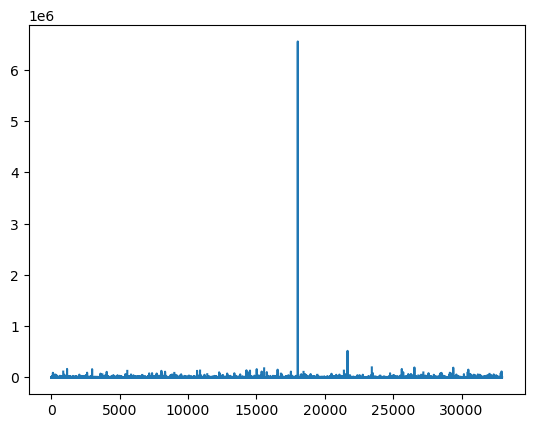

In [38]:
df['Condominio'].plot()

In [39]:
df['Condominio'].max()

6552570.0

# Exemplo Prático

## Análise Exploratória dos Dados
- O principal passo de um projeto de Ciência de Dados, bem antes de usar modelos de Aprendizado de Máquinas, é **entender os seus dados**!
- Algumas etapas são fundamentais nesse processo!
- Para isso, vamos utilizar o dataset do titanic
    - https://www.kaggle.com/competitions/titanic/data
 
# As colunas desse dataset são:
- Passenger ID: ID do passageiro (número único para cada um dos passageiros)
- Survived: sobrevivente (0 = Não, 1 = Sim)
- Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
- Name: nome do passageiro
- Sex: Gênero do passageiro
- Age: Idade (em anos) do passageiro
- SibSp: número de irmãos / cônjuges a bordo do Titanic
- Parch: número de pais / filhos a bordo do Titanic
- Ticket: número do ticket
- Fare: tarifa da passagem
- Cabin: número da cabine
- Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [40]:
# Podemos fazer dessa forma:

import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset de sobreviventes do Titanic
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
df.shape

(891, 15)

In [42]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**A cardinalidade nos ajuda a saber a quantidade de dados distintos em uma coluna**
- Se tivermos muitos valores distintos, provavelmente aquela coluna não será uma boa opção para usarmos no modelo
- Matematicamente, cardinalidade é o número de elementos de um conjunto
- Podemos verificar a cardinalidade usando o `.nunique()`

In [44]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [45]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1,inplace=True)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [47]:
df.shape

(891, 9)

In [48]:
# Verificar a presença de dados faltantes
print("\nDados faltantes:")
df.isnull().sum()


Dados faltantes:


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [49]:
df['Age'].median()

28.0

In [50]:
df.loc[df.Age.isnull(),'Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [51]:
# Imputar a mediana da idade para valores faltantes em 'age'
#df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [52]:
# Remover colunas que não são úteis para nossa análise
df.drop(['Cabin'], axis=1, inplace=True)  # Muitos valores faltantes em 'Cabin'

# Conferir os dados faltantes após as correções
print("\nDados faltantes após tratamento:")
df.isnull().sum()


Dados faltantes após tratamento:


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [53]:
# Verificar e remover duplicatas
df.drop_duplicates(inplace=True)
print("\nDuplicatas removidas. Dimensões atuais:", df.shape)


Duplicatas removidas. Dimensões atuais: (775, 8)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  773 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


In [55]:
# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
df.describe()


Estatísticas Descritivas:


,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
# Estatísticas descritivas por sobreviventes
print("\nEstatísticas por sobrevivência:")
df.groupby('Survived').mean()


Estatísticas por sobrevivência:


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Filtrando apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Aplicando o groupby apenas nas colunas numéricas
df_grouped = df_numeric.groupby(df['Survived']).mean()

df_grouped

Passenger ID: ID do passageiro (número único para cada um dos passageiros)
Survived: sobrevivente (0 = Não, 1 = Sim)
Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
Name: nome do passageiro
Sex: Gênero do passageiro
Age: Idade (em anos) do passageiro
SibSp: número de irmãos / cônjuges a bordo do Titanic
Parch: número de pais / filhos a bordo do Titanic
Ticket: número do ticket
Fare: tarifa da passagem
Cabin: número da cabine
Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

## Visualização de Dados

Vamos visualizar alguns dados para entender as relações no dataset. Usamos gráficos de dispersão, histogramas e gráficos de barras para ilustrar tendências.

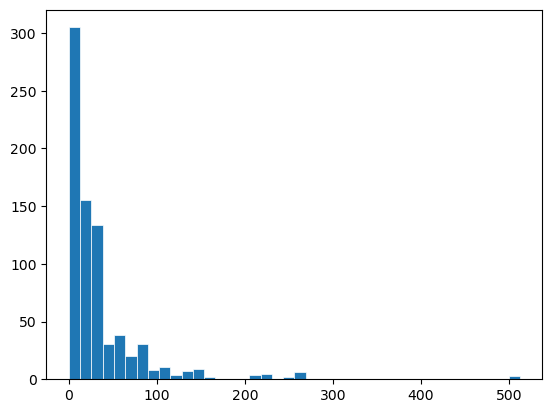

In [57]:
# Verificando o histograma das tarifas
x = df.Fare

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")

plt.show()

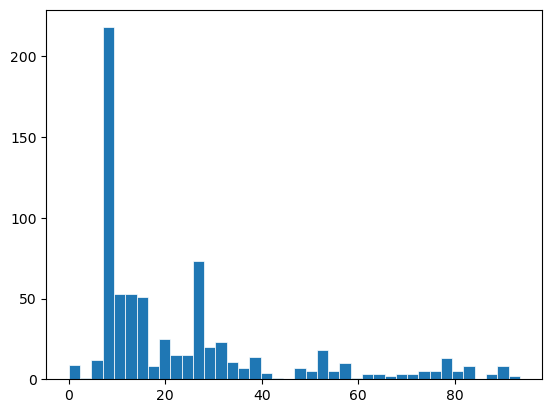

In [58]:
# Verificando o histograma das tarifas apenas para tarifas menores que 100 reais
x = df[df.Fare < 100].Fare

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")

plt.show()

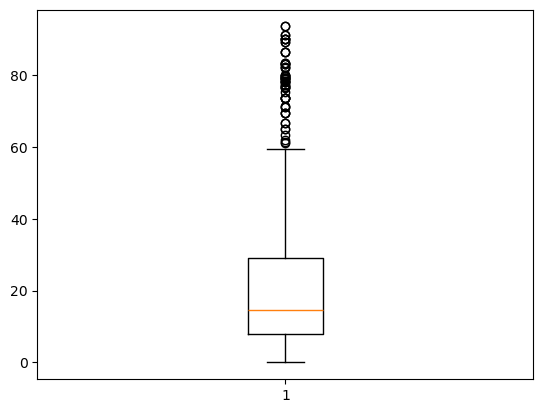

In [59]:
# Verificando o boxplot para a coluna Fare
x = df[df.Fare < 100].Fare

# plot:
fig, ax = plt.subplots()

ax.boxplot(x)

plt.show()

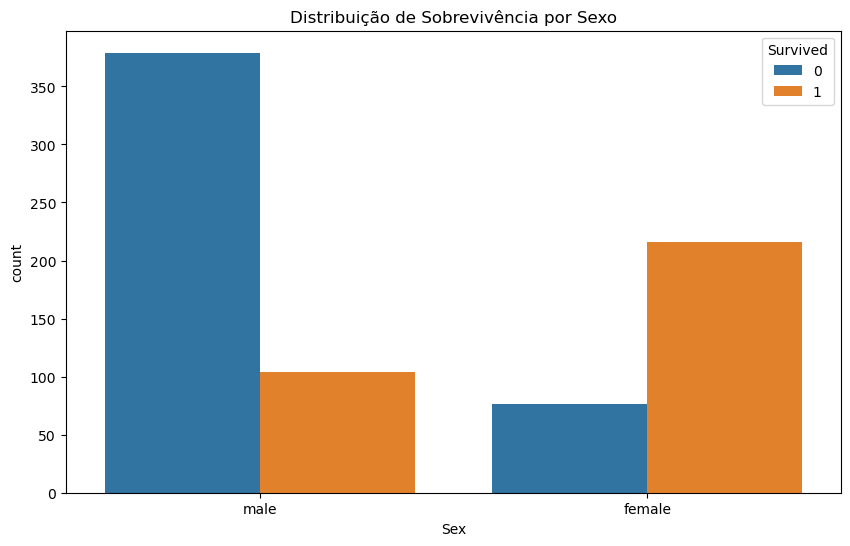

In [60]:
# Gráfico da distribuição de sobrevivência por sexo
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Distribuição de Sobrevivência por Sexo')
plt.show()

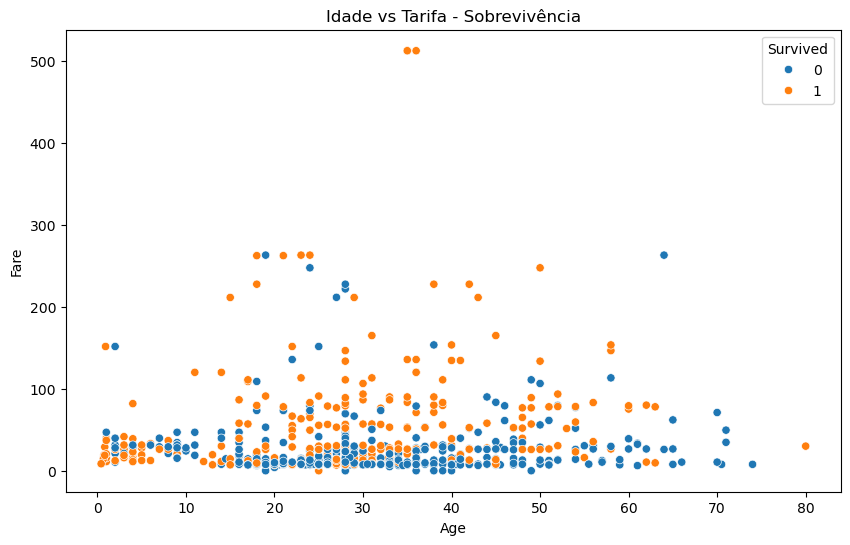

In [61]:
# Gráfico de idade vs tarifa
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Idade vs Tarifa - Sobrevivência')
plt.show()

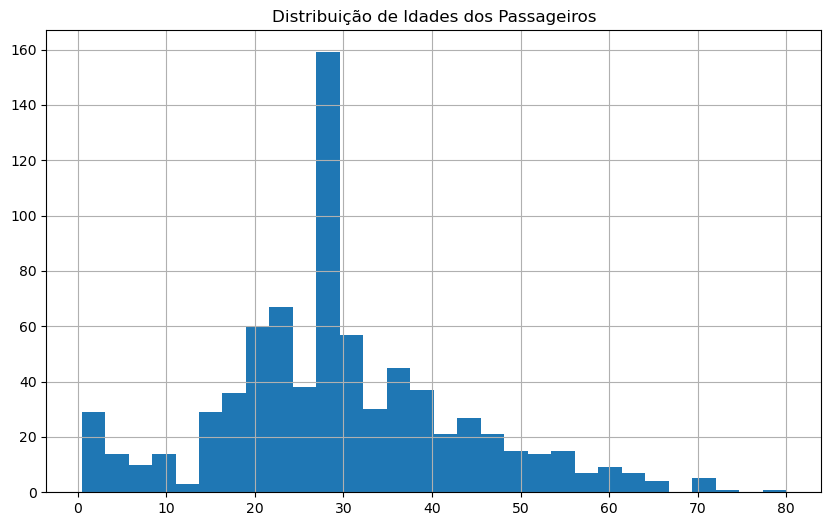

In [62]:
# Histograma da idade dos passageiros
plt.figure(figsize=(10,6))
df['Age'].hist(bins=30)
plt.title('Distribuição de Idades dos Passageiros')
plt.show()

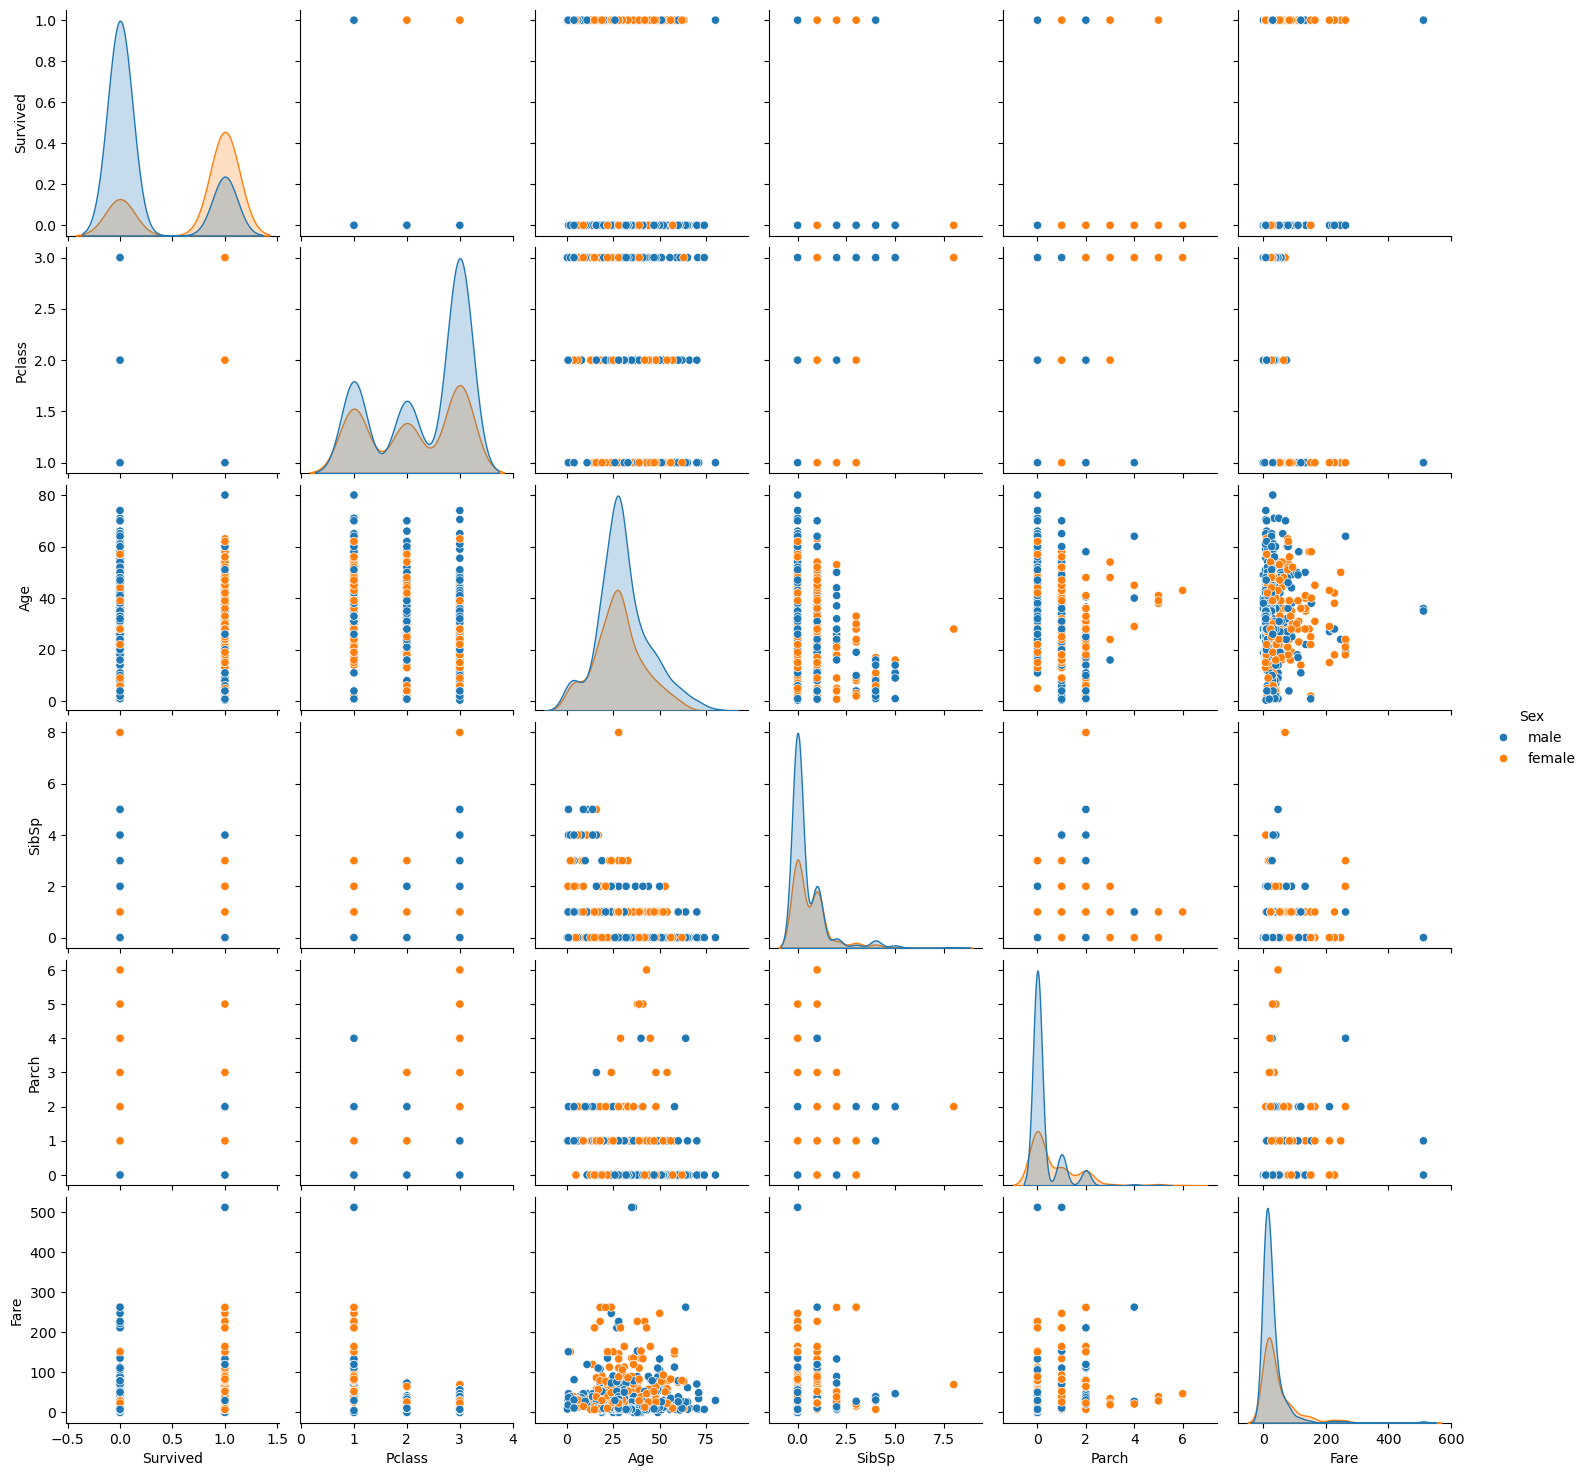

In [64]:
# Criando o pairplot
sns.pairplot(df,hue='Sex')

In [ ]:
df.head()

<Axes: >

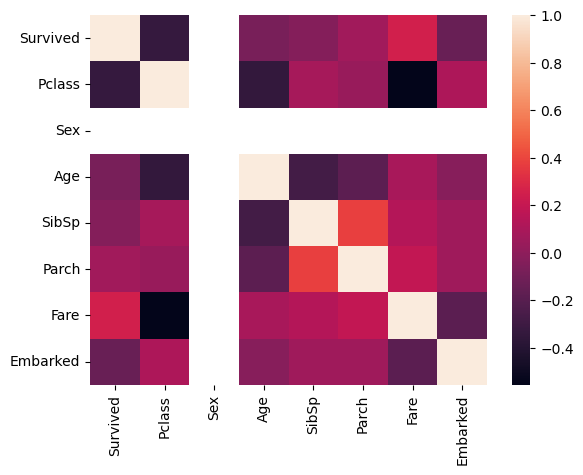

In [72]:
# Utilizando o heatmap do seaborn para tornar essa matriz mais visual
sns.heatmap(df.corr())

In [68]:
df['Sex'] = df.Sex.apply(lambda x:1 if x == 'male' else 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [69]:
df['Embarked'] = df.Embarked.apply(lambda x:1 if x == 'S' else 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [ ]:
# Utilizando o heatmap do seaborn para tornar essa matriz mais visual
sns.heatmap(df.corr())